___
<a href='http://www.kgptalkie.com'><img src='../kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a> and <a href='http://www.youtube.com/kgptalkie'>www.youtube.com/kgptalkie</a> </em></center>

# Feature Reduction, Fine Tuning and Model Selection

# Feature Dimensionality Reduction


Feature reduction is also known as dimensionality reduction. It is the process of reducing the number of features in a resource heavy computation without losing important information.

There are many techniques by which feature reduction is accomplished. 

Some of those are `linear discriminant analysis`, `autoencoders`, `non-negative matrix factorization`, and `principal component analysis`, `Truncated Singular Value Decomposition`.

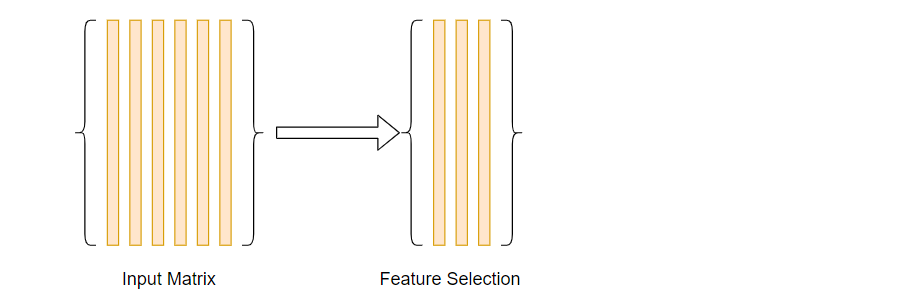

## Why Feature Selection?

The purpose of using feature reduction is to reduce the number of features that the computer must process to perform its function. Feature reduction leads to the need for fewer resources to complete computations.

Less computation time and less storage capacity needed means the computer can do more work. During machine learning, feature reduction removes multicollinearity resulting in improvement of the machine learning model as well. 

### Principal Components Analysis (PCA)

Principal component analysis (PCA) is a popular linear dimensionality reduction
technique. 

PCA projects observations onto the (hopefully fewer) principal compo‐
nents of the feature matrix that retain the most variance. 

PCA is an unsupervised
technique, meaning that it does not use the information from the target vector and
instead only considers the feature matrix.

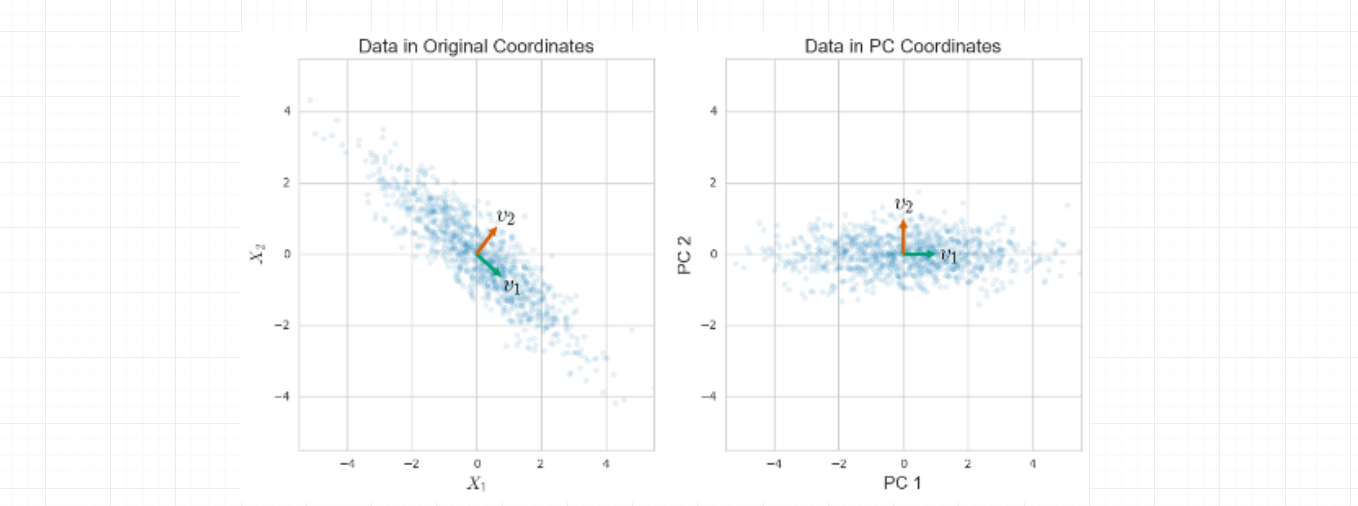

### Linear Discriminant Analysis (LDA)

LDA is a classification that is also a popular technique for dimensionality reduction.

LDA works similarly to principal component analysis (PCA) in that it projects our feature space onto a lower-dimensional space. 

However, in PCA we were only interested in the component axes that maximize the variance in the data, while in LDA we have the additional goal of maximizing the differences between classes. 


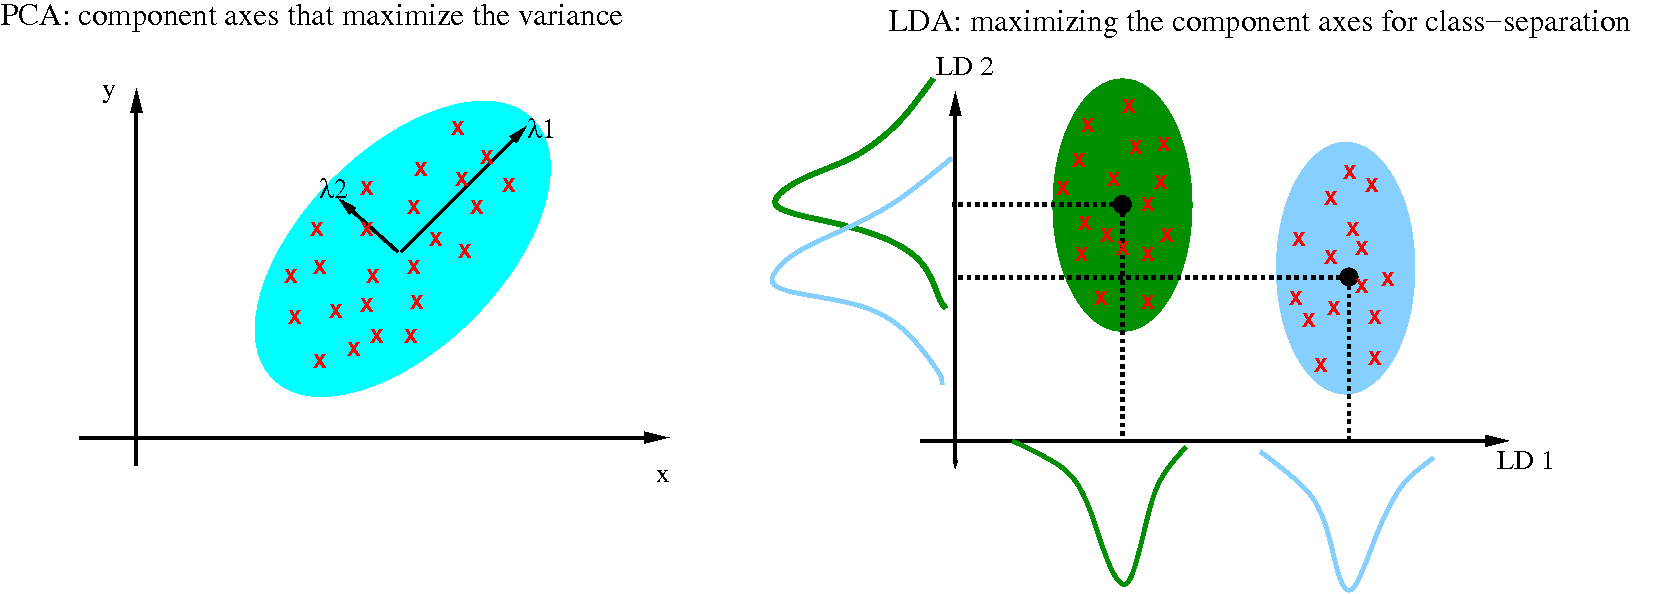

How to Prepare Data for LDA
This section lists some suggestions you may consider when preparing your data for use with LDA.

- **Classification Problems.** This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multi-class classification.

- **Gaussian Distribution.** The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).

- **Remove Outliers.** Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.

- **Same Variance.** LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

### Non-Negative Matrix Factorization (NMF)

NMF is an unsupervised technique for linear dimensionality reduction that factorizes

i.e. breaks up into multiple matrices whose product approximates the original
matrix

NMF can reduce dimensionality because in matrix multiplication, the two factors can have significantly fewer dimensions than the product matrix.

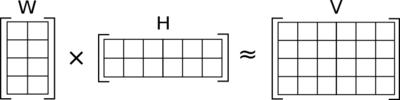

One major requirement of NMA is that, as the name implies, the feature matrix can not contain negative values.


### Truncated Singular Value Decomposition (TSVD) 

TSVD is similar to PCA and in fact, PCA actually often uses non-truncated Singular Value Decomposition (SVD) in one of its steps.





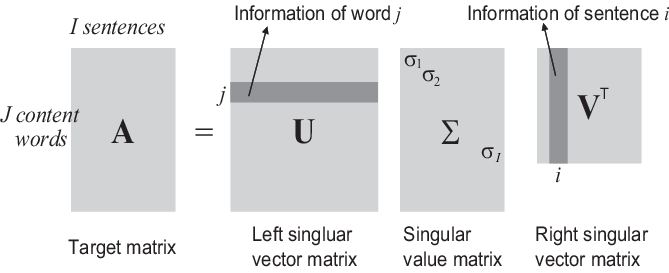

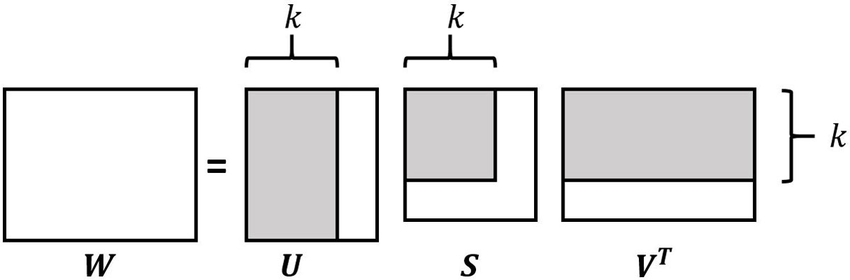

The practical advantage of TSVD is that unlike PCA, it works on sparse feature matrices.



## TF-IDF and Sparse Matrix

In [8]:
import numpy as np
import pandas as pd
import os
import sys

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter30k_cleaned.csv')
df

,twitts,sentiment
0,robbiebronniman sounds like a great night,1
1,damn the person who stolde my wallet may karma...,1
2,greetings from the piano bench photo,1
3,drewryanscott i love it i love you haha forget...,1
4,kissthestars pretty pretty pretty please pakid...,0
...,...,...
29995,calumfan1 is it in any way related to photoshop,0
29996,swiz_nz really wow thats crap,0
29997,at the 2010 lexus hs250h press event again can...,0
29998,karmicunderpath ooh now there is a nice thought,1


In [11]:
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

In [12]:
X = df['twitts']
y = df['sentiment']

In [13]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

In [14]:
X

<30000x42126 sparse matrix of type '<class 'numpy.float64'>'
	with 350520 stored elements in Compressed Sparse Row format>

In [15]:
350520/(X.shape[0]*X.shape[1])

0.00027735840098751366

In [16]:
len(tfidf.vocabulary_)

42126

In [17]:
X.shape, y.shape

((30000, 42126), (30000,))

In [18]:
type(X), type(y)

(scipy.sparse.csr.csr_matrix, pandas.core.series.Series)

In [19]:
sys.getsizeof(X)

56

In [20]:
sys.getsizeof('hello')

54

In [21]:
d = (X.data.nbytes + X.indptr.nbytes + X.indices.nbytes)

In [22]:
d

4326244

In [23]:
d/2**20

4.125827789306641

In [24]:
(X.shape[0] * X.shape[1])*8/(2**20)

9641.876220703125

##  Non-Negative Matrix Factorization (NMF)

In [25]:
from sklearn.decomposition import NMF

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [27]:
%%time
nmf = NMF(n_components=50, random_state=0)
X_train_nmf = nmf.fit_transform(X_train)

Wall time: 51.4 s


In [28]:
X_train.shape, X_train_nmf.shape

((24000, 42126), (24000, 50))

In [29]:
def run_svm(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print()
    print('Printing Report')
    print(classification_report(y_test, y_pred))

In [30]:
%%time
clf = LinearSVC()

X_test_nmf = nmf.transform(X_test)

run_svm(clf, X_train_nmf, X_test_nmf, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3000
           1       0.64      0.68      0.66      3000

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000

Wall time: 558 ms


In [31]:
%%time
clf = LinearSVC()
run_svm(clf, X_train, X_test, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3000
           1       0.75      0.75      0.75      3000

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000

Wall time: 415 ms


## Truncated Singular Value Decomposition (TSVD)

In [32]:
from sklearn.decomposition import TruncatedSVD as TSVD

In [33]:
%%time
tsvd = TSVD(n_components=500, random_state=0)
X_train_tsvd = tsvd.fit_transform(X_train)

Wall time: 22.6 s


In [34]:
sum(tsvd.explained_variance_)

0.3824186985646074

In [35]:
X_test_tsvd = tsvd.transform(X_test)

In [36]:
%%time
clf = LinearSVC()
run_svm(clf, X_train_tsvd, X_test_tsvd, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3000
           1       0.73      0.76      0.74      3000

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000

Wall time: 2.59 s


In [37]:
X.shape, X_train_tsvd.shape

((30000, 42126), (24000, 500))

In [38]:
X_train_tsvd

array([[ 0.13218418,  0.15081949,  0.07174237, ...,  0.00694312,
         0.00537735,  0.00164415],
       [ 0.09547571,  0.01026102, -0.06350304, ...,  0.02398168,
        -0.00099321,  0.00093923],
       [ 0.2162028 , -0.02759448,  0.05896985, ..., -0.02108054,
        -0.01421668,  0.01929527],
       ...,
       [ 0.05353346, -0.01926083, -0.01953992, ..., -0.05901932,
        -0.01147952,  0.05518048],
       [ 0.03616033,  0.00122404, -0.0132424 , ...,  0.00216271,
        -0.00200578,  0.00636467],
       [ 0.09077638, -0.08306414, -0.0348333 , ...,  0.02917843,
         0.01622569, -0.02136172]])

In [39]:
(X.shape[0] * X.shape[1])*8/(2**20)

9641.876220703125

In [40]:
sys.getsizeof(X_train_tsvd)/(2**20)

91.55284118652344

## Hyperparameters Tuning

### What is Parameters?

A model parameter is a configuration variable that is internal to the model and whose value can be estimated from the given data.


* They are required by the model when making predictions.
* Their values define the skill of the model on your problem.
* They are estimated or learned from data.
* They are often not set manually by the practitioner.
* They are often saved as part of the learned model.

### What is a hyperparameter in a machine learning learning model?


A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.


- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.

“If you have to specify a model parameter manually, then it is probably a model hyperparameter. ”

Examples:

- The learning rate for training a neural network.
- The C and sigma hyperparameters for support vector machines.
- The k in k-nearest neighbors.

---

## Hyperparameter Tuning Methods

- Grid Search
- Random Search

### Grid Search for Hyperparameters

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.


### Random Search for Hyperparameters Tuning

Random search differs from grid search in that we longer provide a discrete set of values to explore for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values may be randomly sampled.



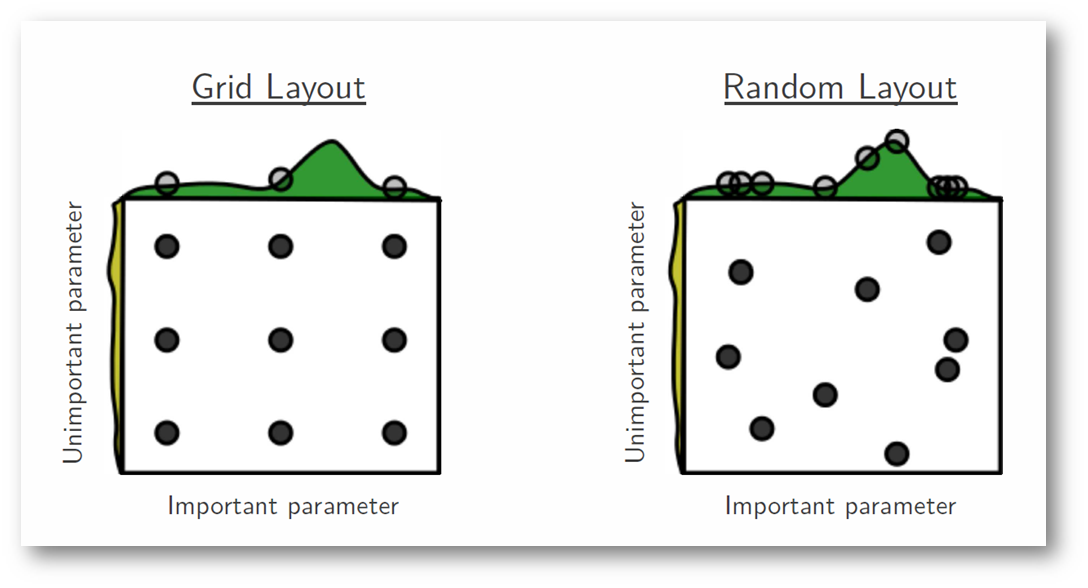

## Grid Search for Hyperparameters with K-Fold Cross-Validation

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter



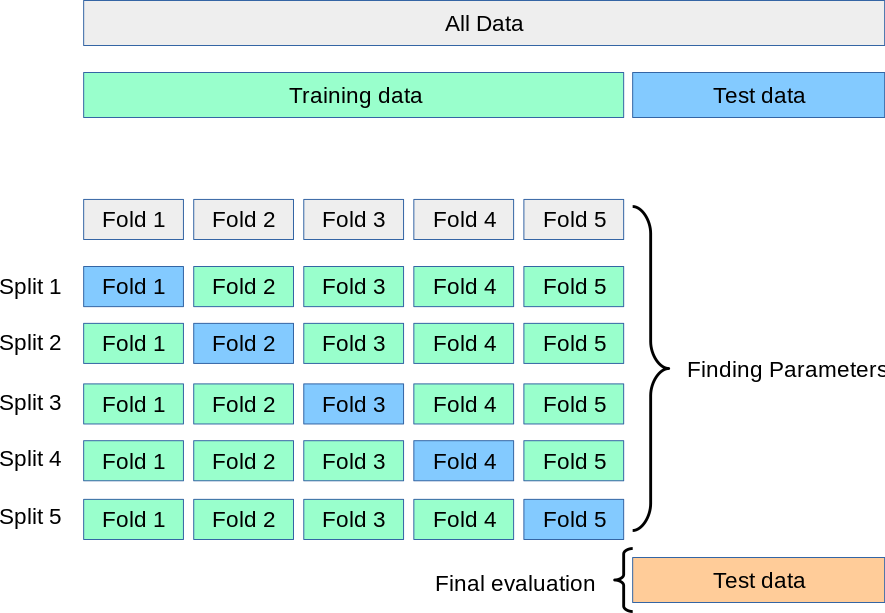

The following procedure is followed for each of the k “folds”:

- A test set is held out for final evaluation
- In the basic approach the training set is split into k smaller sets. 
- A model is trained using  of the folds as training data;
- the resulting model is validated on the remaining part of the data.
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop
- The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

## GridSearch for Logistic Regression Hyperparameters Tuning 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [42]:
train = X_train_tsvd.copy()
test = X_test_tsvd.copy()

In [43]:
model = LogisticRegression(solver = 'liblinear')

In [44]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
max_iter = [100, 500]

In [45]:
hyperparameters = dict(penalty=penalty, C = C, max_iter = max_iter)

In [46]:
clf = GridSearchCV(model, hyperparameters, cv = 5, n_jobs=-1)

In [47]:
best = clf.fit(train, y_train)

In [48]:
best.best_estimator_

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
best.best_params_

{'C': 2.7825594022071245, 'max_iter': 100, 'penalty': 'l2'}

In [50]:
best.best_score_

0.7477083333333333

In [51]:
y_pred = clf.predict(test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      3000
           1       0.73      0.75      0.74      3000

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



## GridSearch for SVM Hyperparameters Tuning 

SVM have following hyperparamters
- C
- gamma
- kernel
- degree

In [53]:
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


from sklearn import datasets
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [56]:
# Set the parameters by cross-validation
hyperparameters = [
    {'kernel': ['rbf'],
     'gamma': [1e-1, 1e-2],
     'C': [1, 10],
     'degree': [2, 3]},
                   
    {'kernel': ['linear'],
     'C': [1, 10]}]

In [57]:
scores = ['precision', 'recall']

def run_tuning(model, hyperparameters, scores):
    for score in scores:
        print("Tuning hyperparamters for %s" % score)
        print()
        
        clf = GridSearchCV(model, hyperparameters, scoring='%s_macro' % score, cv = 5, n_jobs = -1)
        clf.fit(X_train, y_train)
        
        print('Best parameters set found: ')
        print()
        print(clf.best_params_)
        print()
        
        print('Grid scores in process: ')
        print()
        means = clf.cv_results_['mean_test_score']
        
        for mean, params in zip(means, clf.cv_results_['params']):
            print('%0.3f for %r' % (mean, params))
            
        print()
        print()
        
        print('Detailed Classification Report')
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        print()
        
        

In [58]:
run_tuning(SVC(), hyperparameters, scores)

Tuning hyperparamters for precision

Best parameters set found: 

{'C': 1, 'kernel': 'linear'}

Grid scores in process: 

0.946 for {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.910 for {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.946 for {'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
0.910 for {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.968 for {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.955 for {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.968 for {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
0.955 for {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.978 for {'C': 1, 'kernel': 'linear'}
0.951 for {'C': 10, 'kernel': 'linear'}


Detailed Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                        

## Grid Search for Random Forest

Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model.

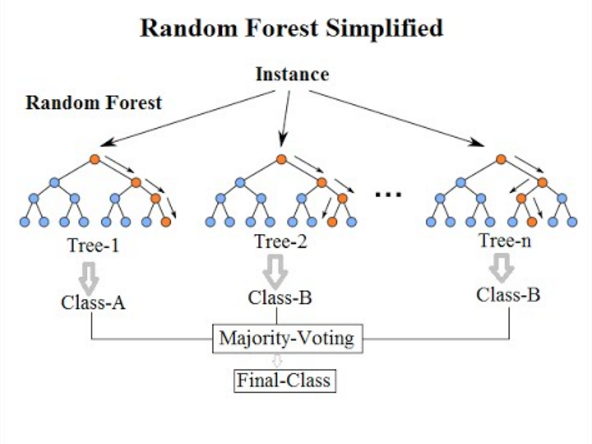


Source: Wikipedia

For a Random Forest Classifier, there are several different hyperparameters that can be adjusted. We will be adjusting there params.

- **n_estimators:** The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
- **max_depth:** The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
- **min_samples_split:** The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
- **min_samples_leaf:** The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.
- **max_features** This parameter will decide how many features will be used in classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
scores = ['precision', 'recall']

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [10, 100],
    'max_features': [2, 3, X.shape[1]],
    'min_samples_leaf': [2, 5],
    'n_estimators': [10, 100, 200]
}

In [67]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [68]:
rfc = RandomForestClassifier(n_jobs=-1)
run_tuning(rfc, hyperparameters, scores)

Tuning hyperparamters for precision

Best parameters set found: 

{'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 10}

Grid scores in process: 

0.944 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 10}
0.951 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 100}
0.951 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
0.959 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 10}
0.942 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 100}
0.951 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 200}
0.942 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 10}
0.951 for {'bootstrap': True, 'max_depth'

## Random Search for Best Parameter Selection

With RandomizedSearchCV, if we specify a distribution, scikit-learn will randomly sample without replacement hyperparameter values from that distribution.

In [70]:
# from sklearn.utils.fixes import loguniform
from scipy.stats import uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV


In [74]:
C = uniform(loc=0, scale=4)
gamma = loguniform(1e-5, 1e-1)
 
hyperparameters = dict(C=C, gamma=gamma)

In [75]:
hyperparameters

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c216bc5b88>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c215ccff48>}

In [76]:
clf = RandomizedSearchCV(SVC(), hyperparameters, cv = 5, n_jobs=-1)

In [77]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C216BC5B88>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C215CCFF48>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [78]:
clf.best_params_

{'C': 2.7899807903692477, 'gamma': 0.04604970797505251}

In [79]:
clf.best_score_

0.95

In [80]:
y_pred = clf.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Selecting Best Models from Multiple ML Algorithms

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [83]:
np.random.seed(0)

In [84]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

search_space = [{"classifier": [LogisticRegression(solver='liblinear')],
                  "classifier__penalty": ['l1', 'l2'],
                  "classifier__C": np.logspace(0, 4, 10)},
                
                {"classifier": [RandomForestClassifier(n_jobs=-1)],
                  "classifier__n_estimators": [10, 100],
                  "classifier__max_features": [1, 3]},
                
                  {"classifier": [SVC()],
                  "classifier__C": [1, 5],
                  "classifier__gamma": [1e-1, 1e-2]}]

In [85]:
clf = GridSearchCV(pipe, search_space, cv = 5, n_jobs = -1)


In [86]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
               

In [87]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [88]:
clf.best_params_

{'classifier': SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'classifier__C': 5,
 'classifier__gamma': 0.1}

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
